In [1]:
#LEVEL-1
import pandas as pd
df = pd.read_csv('Dataset .csv')  
df.head() 


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Step 2: Determine the top three most common cuisines
cuisines_series = df['Cuisines'].str.split(', ')

cuisines_exploded = cuisines_series.explode()

# Count the occurrences of each cuisine and get the top three
top_cuisines = cuisines_exploded.value_counts().head(3)

# Step 3: Calculate the percentage of restaurants serving each of the top cuisines

# Get the total number of restaurants in the dataset
total_restaurants = len(df)

# Calculate the percentage of each top cuisine
cuisine_percentages = (top_cuisines / total_restaurants) * 100

# Display results
print("Top 3 Cuisines:")
print(top_cuisines)

print("\nPercentage of Restaurants Serving Each Cuisine:")
print(cuisine_percentages)


Top 3 Cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

Percentage of Restaurants Serving Each Cuisine:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


In [3]:
# Step 1: Identify the city with the highest number of restaurants
city_counts = df['City'].value_counts()
city_with_max_restaurants = city_counts.idxmax()
max_restaurant_count = city_counts.max()

print("City with the highest number of restaurants:")
print(f"{city_with_max_restaurants} with {max_restaurant_count} restaurants\n")

# Step 2: Calculate the average rating for restaurants in each city
average_ratings = df.groupby('City')['Aggregate rating'].mean()
print("Average Ratings for Restaurants in Each City:")
print(average_ratings)

# Step 3: Determine the city with the highest average rating
city_with_highest_rating = average_ratings.idxmax()
highest_average_rating = average_ratings.max()

print("\nCity with the highest average rating:")
print(f"{city_with_highest_rating} with an average rating of {highest_average_rating}")



City with the highest number of restaurants:
New Delhi with 5473 restaurants

Average Ratings for Restaurants in Each City:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

City with the highest average rating:
Inner City with an average rating of 4.9


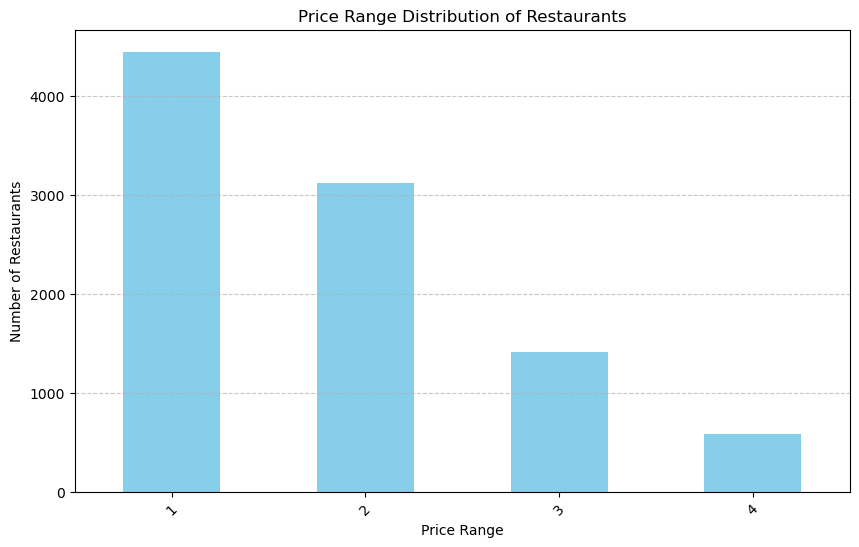

Percentage of Restaurants in Each Price Range:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [4]:
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each price range
price_counts = df['Price range'].value_counts()

# Step 2: Plotting the bar chart
plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue')
plt.title('Price Range Distribution of Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 3: Calculate the percentage of restaurants in each price range
total_restaurants = len(df)
price_percentages = (price_counts / total_restaurants) * 100

# Display the percentage of restaurants in each price range
print("Percentage of Restaurants in Each Price Range:")
print(price_percentages)


In [5]:
# Step 1: Calculate the total number of restaurants
total_restaurants = len(df)

# Step 2: Count the number of restaurants that offer online delivery
online_delivery_count = df[df['Has Online delivery'] == 'Yes'].shape[0]

# Step 3: Calculate the percentage of restaurants that offer online delivery
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

# Display the result
print(f"Percentage of Restaurants Offering Online Delivery: {online_delivery_percentage:.2f}%")

# Step 4: Calculate the average ratings for restaurants with and without online delivery
average_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

# Display the results
print(f"Average Rating of Restaurants with Online Delivery: {average_rating_with_delivery:.2f}")
print(f"Average Rating of Restaurants without Online Delivery: {average_rating_without_delivery:.2f}")


Percentage of Restaurants Offering Online Delivery: 25.66%
Average Rating of Restaurants with Online Delivery: 3.25
Average Rating of Restaurants without Online Delivery: 2.47
